In [1]:
addprocs(8)

8-element Array{Int64,1}:
 2
 3
 4
 5
 6
 7
 8
 9

In [ ]:
include("jl/all.jl");

In [3]:
pos,vx,vy,vz,m = load_realization();
m.s[:] *= sum(m)/MASS_IN_BOX;

In [36]:
length(m)

150149632

In [4]:
typeof(m)

SharedArray{Float32,1}

In [5]:
(SIDE_LEN^3/length(m))^(1/3)

3010.314648627409

In [6]:
SIDE_LEN/512

3125.0

In [7]:
const N = 512
rho = SharedArray(Complex64, (N,N,N));
c = SharedArray(eltype(rho), length(m));

In [28]:
@time to_cic!(pos,m, rho, 0, SIDE_LEN);

  6.315026 seconds (22.56 k allocations: 1.668 MB)


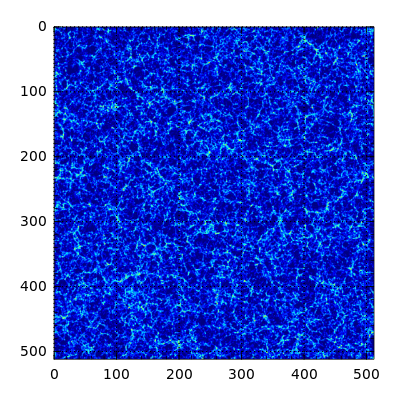

In [29]:
imrho = real(rho[:,:,128]) + real(rho[:,:,129]) + real(rho[:,:,130])
Winston.set_default_plot_size(400,400)
imagesc(log10(30+imrho))
grid(true)

In [30]:
@time to_g_fft!(rho, SIDE_LEN, 3000.0);

 18.099990 seconds (174 allocations: 7.781 KB)


In [31]:
@time from_cic_dim!(c,pos,rho,0,SIDE_LEN,1);

 26.000251 seconds (89.75 k allocations: 1.125 GB, 0.01% gc time)


In [32]:
get_slope_std(real(c[1:100:end]), vx[1:100:end])

(1.6020289f6,140.4632f0)

In [13]:
using NearestNeighbors

In [14]:
@time kd = KDTree(pos.s);

 56.998842 seconds (15.14 M allocations: 4.480 GB, 0.21% gc time)


In [25]:
ixs = rand(1:size(pos)[2], 100000);

In [33]:
@time rngs = inrange(kd, pos[:,ixs], 10000.0);

  1.939704 seconds (803.86 k allocations: 480.657 MB, 13.78% gc time)


In [34]:
_vx = zeros(length(rngs))
_lvx = zeros(length(rngs))
for i in eachindex(rngs)
    _vx[i] = mean(vx[rngs[i]])
    _lvx[i] = mean(real(c[rngs[i]]))
end
get_slope_std(_lvx, _vx)

(1.5727448014530016e6,43.02596361584792)

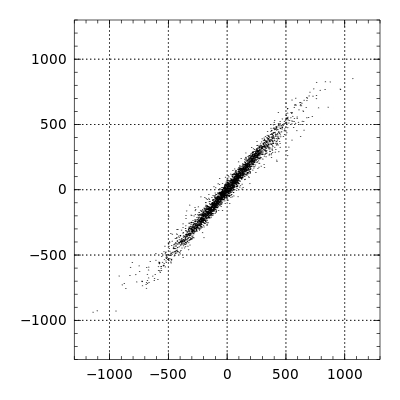

In [35]:
scatter(_lvx*1.573e6, _vx, 0.00001)
ylim(-1300,1300)
xlim(-1300,1300)
grid(true)